# simple Linear regression

## import the libararies

In [275]:
import pandas as pd 
import numpy as np
from sklearn import linear_model #machine learning
import matplotlib.pyplot as plt

### ignore warnings

In [276]:
import warnings 
warnings.filterwarnings('ignore')

# 1.PROBLEM STATEMENT
Salary_hike -> Build a prediction model for Salary_hike 
### read the csv file of SALARY

In [277]:
df=pd.read_csv("Salary_data.csv")

## EDA and Data Visualization

### to see first five row in data

In [278]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### count the number of rows and number of column

In [279]:
df.shape

(30, 2)

### to see is there any null value in our data

In [280]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### to find the no.of the duplicated value in row 

In [281]:
df[df.duplicated()].value_counts() # there is no any duplicated row

Series([], dtype: int64)

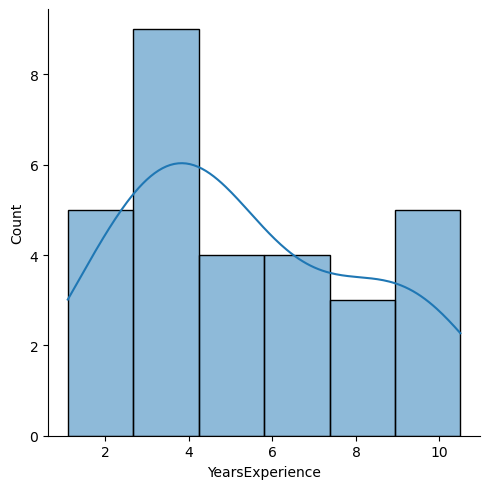

In [291]:
import seaborn as sns
sns.displot(df['YearsExperience'],kde=True)
plt.show()

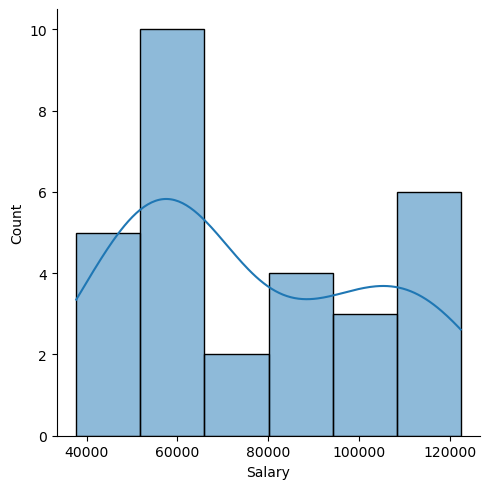

In [289]:

sns.displot(df['Salary'],kde=True)
plt.show()

### scatterplot salary v/s experience

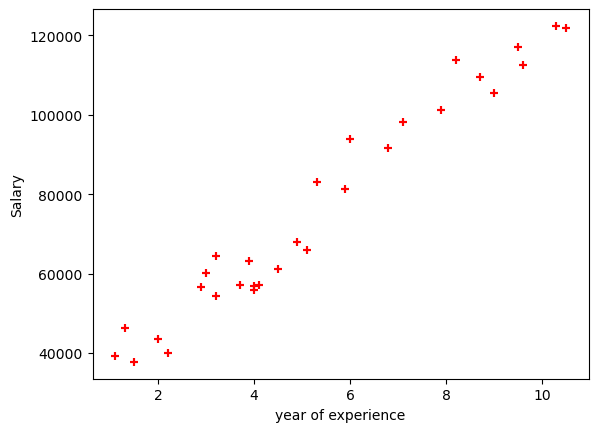

In [288]:
plt.xlabel('year of experience')
plt.ylabel('Salary')
plt.scatter(x=df["YearsExperience"],y=df.Salary,color='red',marker="+")
plt.show()

### Correlation Analysis

In [285]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


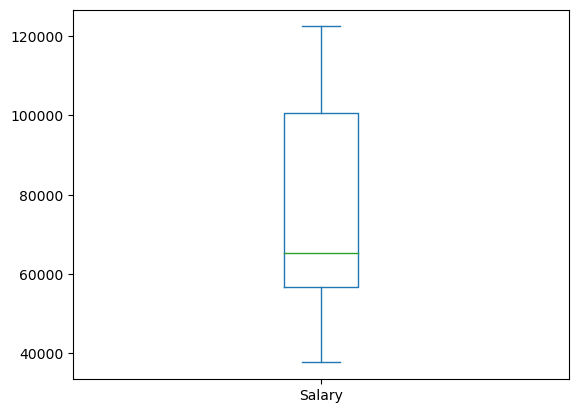

In [290]:

df.Salary.plot(kind="box")
plt.show()

# # to see the best fit line

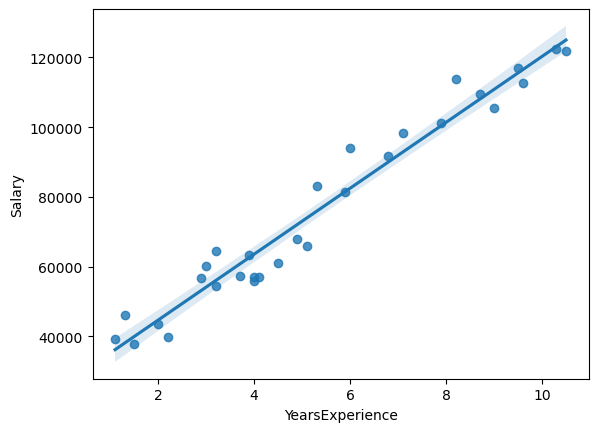

In [292]:
import seaborn as sns
sns.regplot(df["YearsExperience"],df["Salary"],data=df)
plt.show()

# First Model Building

### separating the variables

In [293]:
x=df[["YearsExperience"]]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [294]:
y=df["Salary"]
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

### fit the model

In [295]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### to see the model prediction

In [296]:
y_pred=reg.predict(x)

In [297]:
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

### draw the linear line 
### red stars data points are the predicted values
### orange balls data points are the actual points

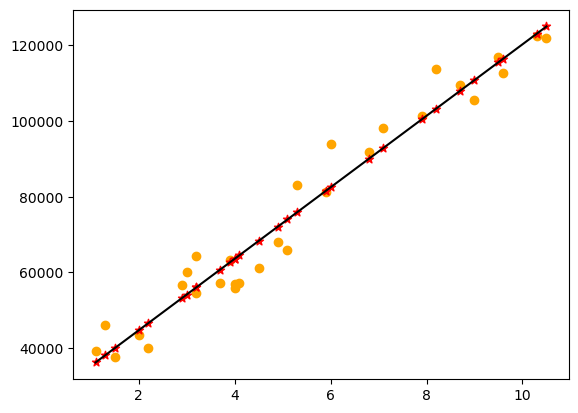

In [300]:

plt.scatter(x=df["YearsExperience"],y=df.Salary,color='orange') 
plt.scatter(x=df["YearsExperience"],y=y_pred,color='red',marker="*") 
plt.plot(df["YearsExperience"],y_pred,color='black')
plt.show()


In [301]:
reg.predict([[3.5]])

array([58867.06832376])

# for model performance

In [302]:
from sklearn.metrics import mean_squared_error,r2_score

### mean square error

In [303]:
y=df.Salary
MSE=mean_squared_error(y,y_pred)

In [304]:
MSE

31270951.722280968

### root mean square error

In [305]:
Root_mse=np.sqrt(MSE)

In [306]:
Root_mse

5592.043608760662

### R2 score

In [307]:
r2_score(y,y_pred)

0.9569566641435086

# Second Model (log transformation)

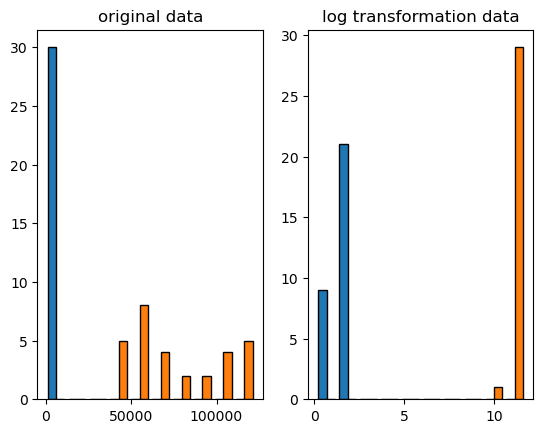

In [308]:
df_log=np.log(df)
#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(df,edgecolor='black')
axs[1].hist(df_log,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('log transformation data')
plt.show()

In [309]:
df_log.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


### Separating the variables

In [310]:
x=df_log[["YearsExperience"]]

In [311]:
y=df_log["Salary"]

## Fit the Model

In [312]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### Predicted value

In [313]:
y_pred=reg.predict(x)
y_pred

array([10.38161597, 10.47551521, 10.55595059, 10.71765347, 10.77122626,
       10.9265052 , 10.94556088, 10.98183726, 10.98183726, 11.06344245,
       11.09303291, 11.10726376, 11.10726376, 11.1211432 , 11.17346829,
       11.22133455, 11.2438211 , 11.26544256, 11.32572408, 11.33517117,
       11.40552398, 11.42979057, 11.48980366, 11.51075349, 11.5440229 ,
       11.56307858, 11.59346916, 11.59935496, 11.63891522, 11.64972496])

# for model performance

In [216]:
from sklearn.metrics import mean_squared_error,r2_score

### Root mean square error

In [314]:

MSE=mean_squared_error(y,y_pred)
MSE
Root_mse=np.sqrt(MSE)
Root_mse

0.11163070330504787

## R2 score

In [315]:
r2_score(y,y_pred)

0.9052150725817151

# Third Model (Squareroot transformation)

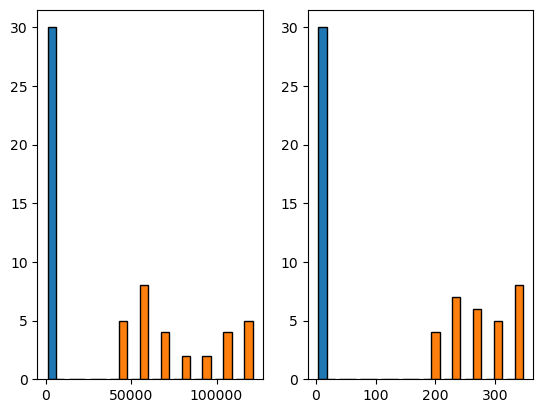

In [316]:
df_sqrt=np.sqrt(df)

#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(df,edgecolor='black')
axs[1].hist(df_sqrt,edgecolor='black')
plt.show()

In [317]:
df_sqrt.head()

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314


### separating the variables

In [318]:
x=df_sqrt[['YearsExperience']]

In [319]:
y=df_sqrt['Salary']

## Fit the Model

In [320]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### Predict the value

In [321]:
y_pred=reg.predict(x)
y_pred

array([182.88622598, 189.79599988, 196.19172763, 210.52066342,
       215.74089823, 232.35605495, 234.55771912, 238.85359917,
       238.85359917, 249.0393387 , 252.91925438, 254.82189445,
       254.82189445, 256.70089648, 263.99697981, 270.97538072,
       274.35768907, 277.67430277, 287.26520996, 288.81542461,
       300.77894118, 305.08223134, 316.13218413, 320.13060635,
       326.63543214, 330.44882634, 336.66588965, 337.88950886,
       346.28217966, 348.62729837])

# For model performance

In [225]:
from sklearn.metrics import mean_squared_error,r2_score

### Root mean square error

In [322]:

MSE=mean_squared_error(y,y_pred)
MSE
Root_mse=np.sqrt(MSE)
Root_mse

11.765354505779554

### r2_score

In [323]:
r2_score(y,y_pred)

0.9419490138976824

# Forth Model ( cube transformation)

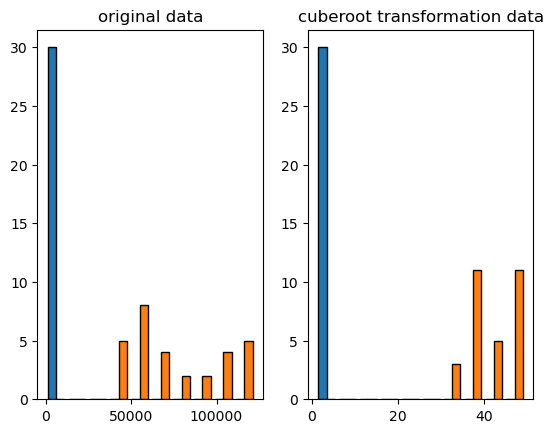

In [335]:
df_cbrt=np.cbrt(df)

#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(df,edgecolor='black')
axs[1].hist(df_cbrt,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('cuberoot transformation data')
plt.show()

In [336]:
df_cbrt.head()

,YearsExperience,Salary
0,1.032280,34.011242
1,1.091393,35.883626
2,1.144714,33.540235
3,1.259921,35.175984
4,1.300591,34.168426


### Separating the variables

In [337]:
x=df_cbrt[['YearsExperience']]

In [338]:
y=df_cbrt['Salary']

## Fit the model

In [339]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### Predict the value

In [340]:
y_pred=reg.predict(x)
y_pred

array([32.03738148, 32.91794016, 33.71222856, 35.42837818, 36.03421466,
       37.90297479, 38.14438975, 38.61158133, 38.61158133, 39.7000173 ,
       40.10788476, 40.30660278, 40.30660278, 40.50203582, 41.25344687,
       41.96154956, 42.30120448, 42.63209166, 43.57734029, 43.72856292,
       44.8817694 , 45.29083341, 46.32812435, 46.69901084, 47.29754881,
       47.64572944, 48.20922439, 48.3195363 , 49.07105184, 49.27948699])

## For model performance

In [330]:
from sklearn.metrics import mean_squared_error,r2_score

### Root mean Square error

In [341]:

MSE=mean_squared_error(y,y_pred)
MSE
Root_mse=np.sqrt(MSE)
Root_mse

1.306529847589427

### R2_score

In [342]:
r2_score(y,y_pred)

0.9324434036761005

# fifth Model (min max transformation)

In [343]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [344]:
# Normalized data frame 
df_norm = norm_func(df.iloc[:])
df_norm.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


### Separating the variable

In [345]:
x=df_norm[["YearsExperience"]]

In [346]:
y=df_norm["Salary"]

## Fit the model

In [347]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### Predict the value

In [348]:
y_pred=reg.predict(x)
y_pred

array([-0.01823578,  0.00408872,  0.02641323,  0.08222448,  0.10454899,
        0.18268475,  0.193847  ,  0.21617151,  0.21617151,  0.27198276,
        0.29430727,  0.30546952,  0.30546952,  0.31663177,  0.36128078,
        0.40592978,  0.42825429,  0.45057879,  0.5175523 ,  0.52871455,
        0.61801257,  0.65149932,  0.74079734,  0.77428409,  0.83009535,
        0.86358211,  0.91939336,  0.93055562,  1.00869138,  1.03101588])

## For model performance

In [243]:
from sklearn.metrics import mean_squared_error,r2_score

### root mean square error

In [349]:

MSE=mean_squared_error(y,y_pred)
MSE
Root_mse=np.sqrt(MSE)
Root_mse

0.06605296017907702

### r2_score

In [350]:
r2_score(y,y_pred)

0.9569566641435086

## Conclusion = First and fifth  both are best Model because it give the high R2_score Value
#### (both model have equal R2_score value)

#  Problem-2
Delivery_time -> Predict delivery time using sorting time .....?

### read the csv file of DELIVERY TIME

In [351]:
data=pd.read_csv("Delivery_time.csv")

# EDA 

### head of the data

In [352]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### count the number of rows and number of column

In [353]:
data.shape

(21, 2)

### to see is there any null value in our data

In [354]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### to find the no.of the duplicated value in row 

In [355]:
data[data.duplicated()].value_counts() # there is no any duplicated row

Series([], dtype: int64)

### scatter plot of given data

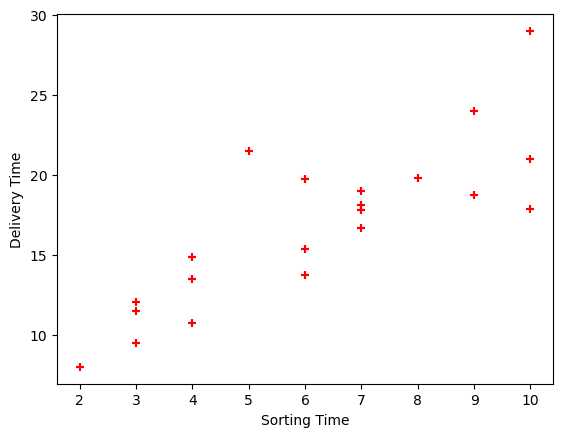

In [357]:

plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.scatter(x=data["Sorting Time"],y=data['Delivery Time'],color='red',marker="+")
plt.show()

### Box plot to detect the outlier

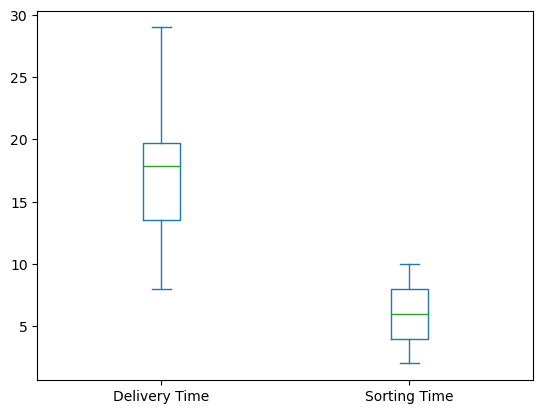

In [358]:

data.plot(kind="box")
plt.show()

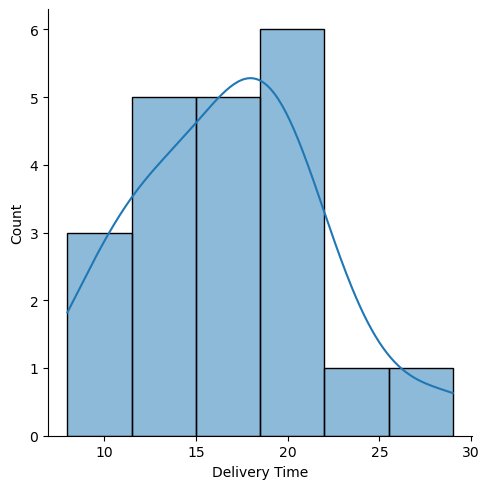

In [359]:
import seaborn as sns
sns.displot(data['Delivery Time'],kde=True)
plt.show()

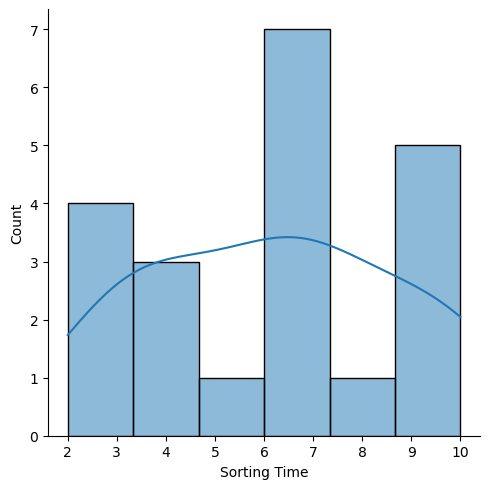

In [360]:
import seaborn as sns
sns.displot(data['Sorting Time'],kde=True)
plt.show()

# to see the best fit line

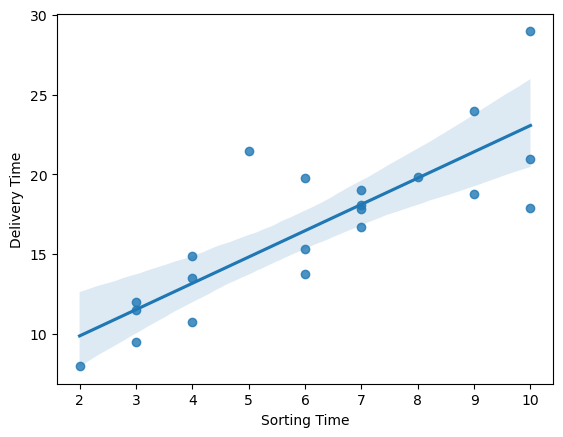

In [361]:
import seaborn as sns
sns.regplot(data["Sorting Time"],data["Delivery Time"],data=data)
plt.show()

# first Model

### separating the variables

In [362]:
x=data[["Sorting Time"]]
x.head()

,Sorting Time
0,10
1,4
2,6
3,9
4,10


In [363]:
y=data["Delivery Time"]

# fit the model

In [364]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

# to see the model prediction

In [365]:
y_pred=reg.predict(x)


In [366]:
y_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

### draw the linear line
### red stars data points are the predicted values
### blue balls data points are the actual points


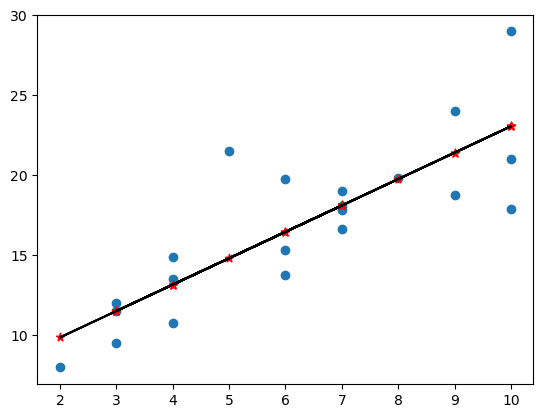

In [367]:

plt.scatter(x=data["Sorting Time"],y=data["Delivery Time"]) 
plt.scatter(x=data["Sorting Time"],y=y_pred,color='red',marker="*") 
plt.plot(data["Sorting Time"],y_pred,color='black')
plt.show()

In [368]:
reg.predict([[10]])

array([23.07293294])

# for model performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

### mean square error

In [369]:

MSE=mean_squared_error(y,y_pred)

In [370]:
MSE

7.793311548584063

### root mean square error

In [371]:
Root_mse=np.sqrt(MSE)

In [372]:
Root_mse

2.7916503270617654

### R2 score

In [373]:
r2_score(data["Delivery Time"],y_pred)

0.6822714748417231

# Second Model ( log transformation)

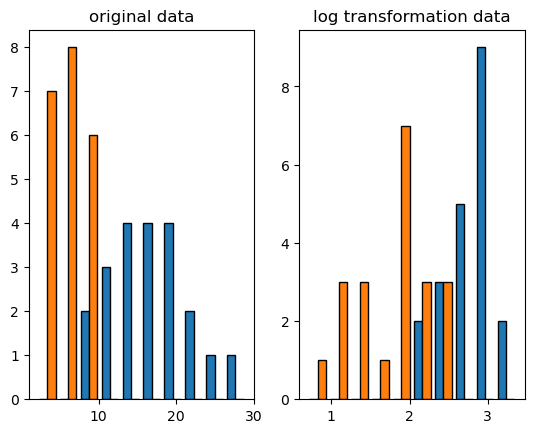

In [374]:
data_log=np.log(data)
#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)
#creat histogram
axs[0].hist(data,edgecolor='black')
axs[1].hist(data_log,edgecolor='black')
#add title
axs[0].set_title('original data')
axs[1].set_title('log transformation data')
plt.show()

In [375]:
data_log.head()

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


### separate the variables

In [376]:
x=data_log[['Sorting Time']]
x.head()

,Sorting Time
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585


In [377]:
y=data_log['Delivery Time']
y.head()

0    3.044522
1    2.602690
2    2.983153
3    3.178054
4    3.367296
Name: Delivery Time, dtype: float64

### fit the model

In [378]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### Predict the Model

In [379]:
y_pred=reg.predict(x)
y_pred

array([3.1178331 , 2.57032892, 2.81260338, 3.05487783, 3.1178331 ,
       2.81260338, 2.90471185, 2.39843246, 3.1178331 , 3.05487783,
       2.98449984, 2.57032892, 2.90471185, 2.39843246, 2.39843246,
       2.57032892, 2.81260338, 2.90471185, 2.15615801, 2.90471185,
       2.70366218])

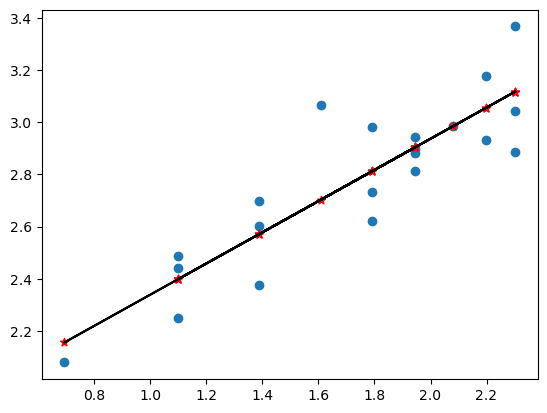

In [380]:

plt.scatter(x,y) 
plt.scatter(x,y=y_pred,color='red',marker="*") 
plt.plot(x,y_pred,color='black')
plt.show()

In [381]:
reg.predict([[10]])

array([7.71721038])

# for model performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

### calculate the Root mean square error

In [382]:

MSE=mean_squared_error(y,y_pred)
MSE

0.021973058112488144

In [383]:
Root_mse=np.sqrt(MSE)
Root_mse

0.14823312083501494

### R2_score

In [384]:
 r2_score(y,y_pred)

0.77216134926874

# Third Model ( Squareoot transformation)

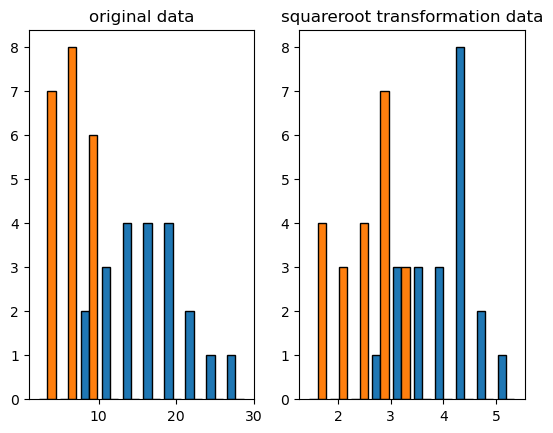

In [385]:
data_sqrt=np.sqrt(data)
#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)
#creat histogram
axs[0].hist(data,edgecolor='black')
axs[1].hist(data_sqrt,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('squareroot transformation data')
plt.show()

### Separating the variables

In [386]:
x=data_sqrt[['Sorting Time']]
x.head()

,Sorting Time
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278


In [387]:
y=data_sqrt['Delivery Time']
y.head()

0    4.582576
1    3.674235
2    4.444097
3    4.898979
4    5.385165
Name: Delivery Time, dtype: float64

## Fit the model

In [388]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### predict the model

In [389]:
y_pred=reg.predict(x)
y_pred

array([4.78276673, 3.61791244, 4.06839864, 4.62012932, 4.78276673,
       4.06839864, 4.2650953 , 3.34936923, 4.78276673, 4.62012932,
       4.44817609, 3.61791244, 4.2650953 , 3.34936923, 3.34936923,
       3.61791244, 4.06839864, 4.2650953 , 3.03082738, 4.2650953 ,
       3.85450375])

# for Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:

MSE=mean_squared_error(y,y_pred)
MSE

### Calculating the root mean Square error

In [ ]:
Root_mse=np.sqrt(MSE)
Root_mse

### Calculating the R2 score

In [390]:
r2_score(y,y_pred)

0.7292011987544664

# Forth Model (cuberoot transformation)

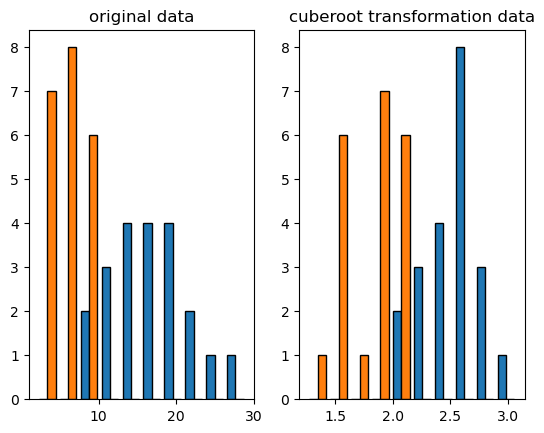

In [391]:
data_cbrt=np.cbrt(data)

#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(data,edgecolor='black')
axs[1].hist(data_cbrt,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('cuberoot transformation data')
plt.show()

### separating the variables

In [392]:
x=data_cbrt[['Sorting Time']]
x.head()

,Sorting Time
0,2.154435
1,1.587401
2,1.817121
3,2.080084
4,2.154435


In [393]:
y=data_sqrt['Delivery Time']
y.head()

0    4.582576
1    3.674235
2    4.444097
3    4.898979
4    5.385165
Name: Delivery Time, dtype: float64

## Fit the model

In [394]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### predict the model

In [395]:
y_pred=reg.predict(x)
y_pred

array([4.76085406, 3.62883935, 4.08744689, 4.61242146, 4.76085406,
       4.08744689, 4.27872125, 3.33906181, 4.76085406, 4.61242146,
       4.45254371, 3.62883935, 4.27872125, 3.33906181, 3.33906181,
       3.62883935, 4.08744689, 4.27872125, 2.97506477, 4.27872125,
       3.87354544])

# For Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

### Calculating the root mean sqaure error

In [396]:

MSE=mean_squared_error(y,y_pred)
MSE

0.09897702288605863

In [397]:
Root_mse=np.sqrt(MSE)
Root_mse

0.31460613930128356

### calculating the r2 Score

In [398]:
r2_score(data_sqrt['Delivery Time'],y_pred)

0.7348008287010694

# fifth model (min max transformation)

In [399]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [400]:
# Normalized data frame 
data_norm = norm_func(data.iloc[:])
data_norm.head()

,Delivery Time,Sorting Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


### separating the variables

In [401]:
x=data_norm[['Sorting Time']]
x.head()

,Sorting Time
0,1.000
1,0.250
2,0.500
3,0.875
4,1.000


In [403]:
y=data_norm[['Delivery Time']]
y.head()

,Delivery Time
0,0.619048
1,0.261905
2,0.559524
3,0.761905
4,1.000000


### Fit the model

In [404]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### Predict the model

In [405]:
y_pred=reg.predict(x)
y_pred.reshape(1,-1)

array([[0.71775871, 0.24661017, 0.40365968, 0.63923395, 0.71775871,
        0.40365968, 0.48218444, 0.16808541, 0.71775871, 0.63923395,
        0.5607092 , 0.24661017, 0.48218444, 0.16808541, 0.16808541,
        0.24661017, 0.40365968, 0.48218444, 0.08956066, 0.48218444,
        0.32513493]])

# Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

### Calculating the root mean square error

In [406]:

MSE=mean_squared_error(y,y_pred)
MSE

0.017671908273433252

In [407]:
Root_mse=np.sqrt(MSE)
Root_mse

0.1329357298600841

### calculating the R2 score

In [408]:
r2_score(y,y_pred)

0.6822714748417231

# Sixth Model (exponential Transformation)

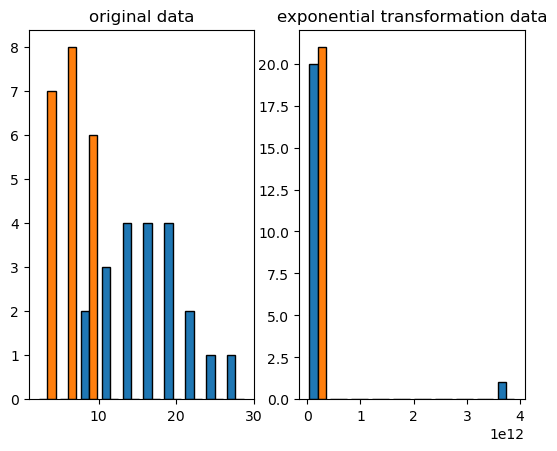

In [409]:
data_exp=np.exp(data)

#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(data,edgecolor='black')
axs[1].hist(data_exp,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('exponential transformation data')
plt.show()

### separating the variables

In [410]:
x=data_exp[['Sorting Time']]
x.head()

,Sorting Time
0,22026.465795
1,54.598150
2,403.428793
3,8103.083928
4,22026.465795


In [411]:
y=data_exp['Delivery Time']
y.head()

0    1.318816e+09
1    7.294164e+05
2    3.778470e+08
3    2.648912e+10
4    3.931334e+12
Name: Delivery Time, dtype: float64

## Fit the model

In [412]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

### Predict the model

In [413]:
y_pred=reg.predict(x)
y_pred.reshape(1,-1)



array([[ 1.21067657e+12, -5.92798677e+10, -3.91177346e+10,
         4.05916194e+11,  1.21067657e+12, -3.91177346e+10,
         9.48925028e+08, -6.12746693e+10,  1.21067657e+12,
         4.05916194e+11,  1.09861398e+11, -5.92798677e+10,
         9.48925028e+08, -6.12746693e+10, -6.12746693e+10,
        -5.92798677e+10, -3.91177346e+10,  9.48925028e+08,
        -6.20085157e+10,  9.48925028e+08, -5.38574350e+10]])

# Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

### Calculate the root mean square error

In [414]:

MSE=mean_squared_error(y,y_pred)
MSE

5.087682501176993e+23

In [415]:
Root_mse=np.sqrt(MSE)
Root_mse

713279924095.512

### calculating the accuracy 

In [262]:
r2_score(y,y_pred)

0.6822714748417231

### CONCLUSION  2nd model is best because it give high r2 score value